<h1> <b>CMSC320 Final Project: Heart Disease Prediction (Senthoor Krishnaraju) </b> </h1>


<h2> <b>Checkpoint 1</b> </h2>

<b>Dataset Chosen</b>: UCI Heart Disease Dataset

<b>Source</b>: https://archive.ics.uci.edu/dataset/45/heart+disease

<b>Why This Dataset?</b>

I chose the UCI Heart Disease Dataset because it’s small but packed with useful medical data. It includes patient information like age, cholesterol levels, blood pressure, and other factors that could indicate 

heart disease. The dataset is well-known and commonly used for machine learning, which makes it perfect for this project.

It’s also great because it allows me to build a classification model to predict whether someone might have heart disease based on their health stats. Since the data is already structured, I won’t have to do too 

much cleaning, but there’s still plenty of room for analysis, visualizations, and machine learning.

GitHub Repo: https://github.com/s-krishnaraju/CMSC320_Final_Project


<h2> <b>Checkpoint 2</b> </h2>

## Data Preprocessing 

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45) 
# This df tells us all the features/attributes about a patient (such as age, sex, cholesterol, blood pressure etc ...)
df_features = heart_disease.data.features
# This df represents whether or not the patient has heart disease. Num is integer valued with 0 meaning absence of heart disease and 1-4 signaling presence of heart disease among the patients
df_heart_disease = heart_disease.data.targets 

## Summary Statistics

 There are 303 entries in our dataset and about 14 features. The dataset has a mix of categorical and both numerical (normally distributed and parametric) data.                   

 Some of the main features are age, sex (1 = male; 0 = female), trestbps (resting blood pressure), chol (total cholesterol levels). 
 
 The target variable that we are trying to predict is the diagnosis of heart disease, and this is represented by the nums field (0 = absence of heart disease; 1-4 = presence of heart disease).

 We also made plots showing the distribution of all the feature variables as well as a heat map showing the correlation of all the features

In [82]:
# Basic summary statistics  
display("Heart Disease Summary:", df_heart_disease.describe())
display("Features Summary:", df_features.describe())
display("Unique Values per Feature:", df_features.nunique())


'Heart Disease Summary:'

,num
count,303.000000
mean,0.937294
std,1.228536
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,4.000000


'Features Summary:'

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


'Unique Values per Feature:'

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
dtype: int64

<Figure size 1200x600 with 0 Axes>

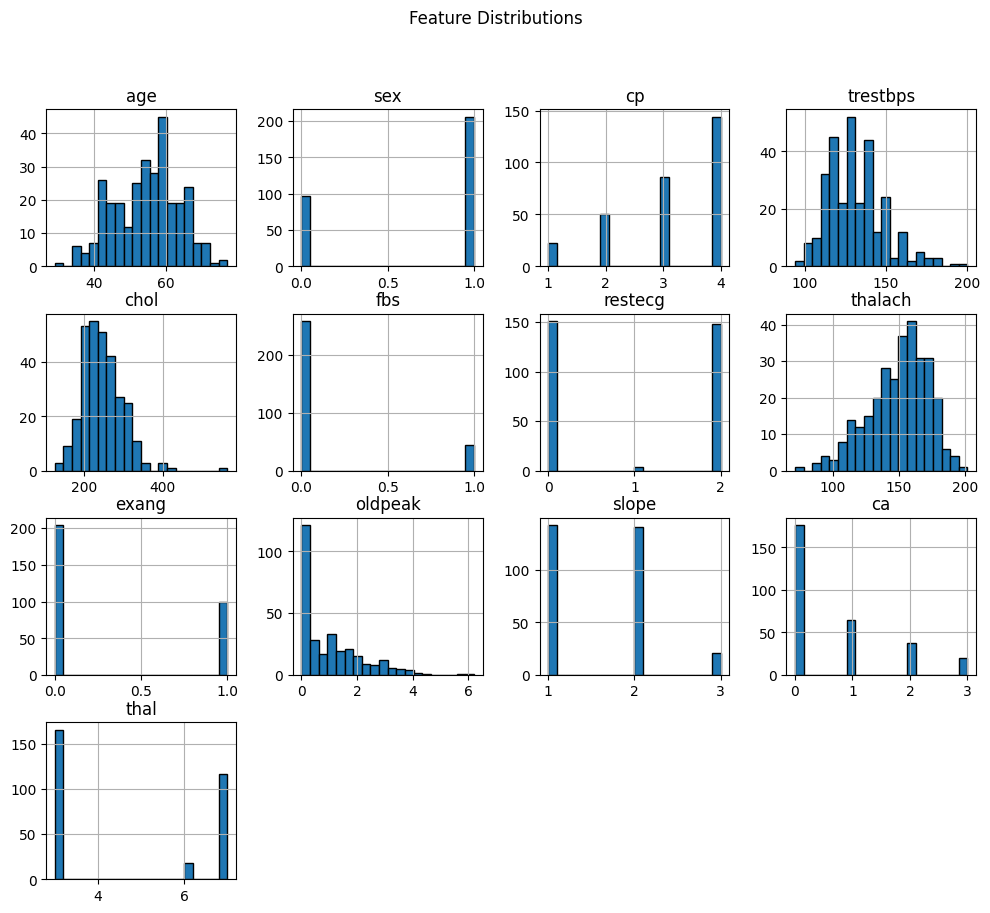

In [83]:
# Looking at distribution / any outliers for the features 
plt.figure(figsize=(12, 6))
df_features.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

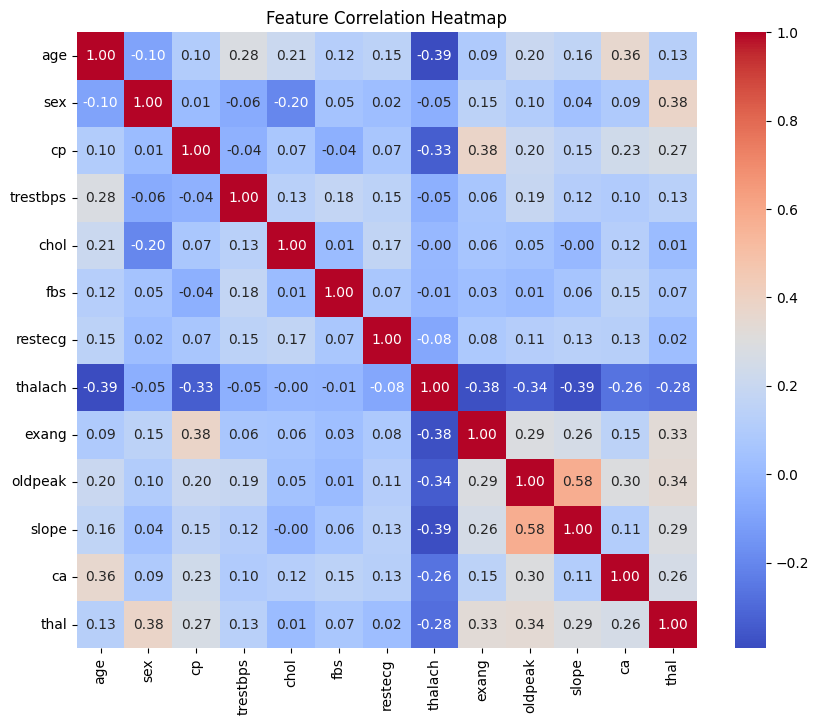

In [84]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

## First Method: T-test
We conduct a t-test to compare the mean age between patients with and without heart disease to see if there is a relation between age and heart disease. 

H0: The difference between the mean age of patients with and without heart disease is 0
HA: The difference between means is not 0

We end up with a p-value less than our significance level (.05), so we end up rejecting our H0 and accepting our HA that there is a significant difference between means in our two groups 

Ultimately, we can draw the conclusion that the age of a patient is one of the major factors that contribute/correlate to whether or not they have heart disease, and this makes sense since usually older patients are more at risk to diseases like heart disease. We can see this trend in histogram/lineplot graph where the no heart disease group is cleary skewed towards the lower/younger ages.

T-test results for Age distribution: t-stat=-4.030, p-value=0.000


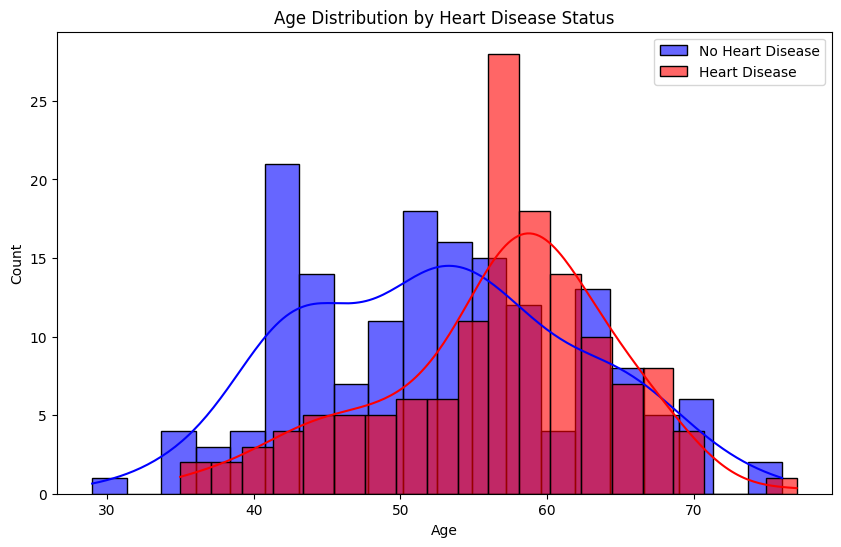

In [85]:
group_0 = df_features[df_heart_disease['num'] == 0]['age']
group_1 = df_features[df_heart_disease['num'] > 0]['age']

stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
print(f"T-test results for Age distribution: t-stat={stat:.3f}, p-value={p_value:.3f}")

plt.figure(figsize=(10, 6))
sns.histplot(group_0, label="No Heart Disease", color="blue", kde=True, bins=20, alpha=0.6)
sns.histplot(group_1, label="Heart Disease", color="red", kde=True, bins=20, alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Heart Disease Status")
plt.legend()
plt.show()



## Second Method: Chi-Squared Test
We conduct a chi squared test in order to see the effect/relationship between the categorical variable, gender, and the presence of heart disease. 

H0: There is no relationship between type of gender and the presence of heart disease 

HA: There is a relationship between the type of gender and the presence of heart disease 

We end up with a p-value less than our sig. level, so we end up rejecting our null hypothesis and accepting our HA, indicating that there is a significant association between gender and presence of heart disease. 

We observe that our bar graph, which shows the porportion of heart disease for each gender, fits our results from the chi squared test since it's clear to see that the porportion of Males with heart disease is significantly higher than that of Females. 

Chi-square test for Gender vs Heart Disease: chi2=22.043, p-value=0.000


<Figure size 800x600 with 0 Axes>

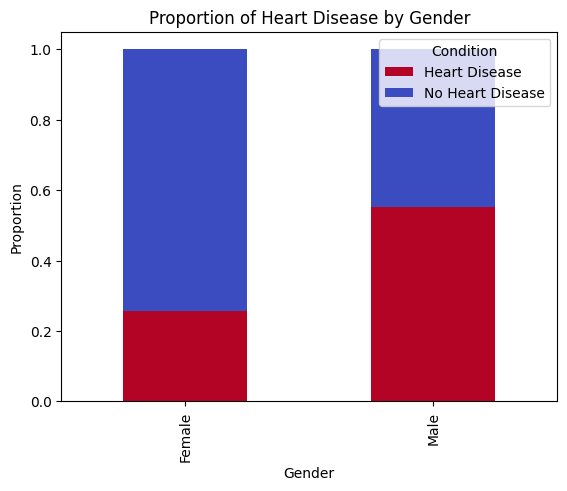

In [86]:
gender = df_features["sex"].map({0:"Female", 1:"Male"})
gender_heart_disease = pd.crosstab(gender, df_heart_disease['num'] > 0).reindex([True, False],axis="columns")
chi2, p, dof, expected = stats.chi2_contingency(gender_heart_disease)

print(f"Chi-square test for Gender vs Heart Disease: chi2={chi2:.3f}, p-value={p:.3f}")

plt.figure(figsize=(8, 6))
gender_heart_disease.div(gender_heart_disease.sum(1), axis=0).plot(kind='bar', stacked=True, colormap='coolwarm_r')
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.title("Proportion of Heart Disease by Gender")
plt.legend(["Heart Disease", "No Heart Disease"], title="Condition")
plt.show()

## Third Method: Mann-Whitney U Test
We wanted to look at the relationship of the resting blood pressure of a patient (trestbps) and whether they have heart disease, however one issue we encountered is that the distribution of trestbps (in the previous distribution plots) looks a little off and seems to be skewed left. Since the data for trestbps seems to be not perfectly normal distributed, we decided to use a Mann Whitney U test (instead of t-test) in order to compare the blood pressure of patients with and without heart disease.

H0: There is no significant difference in resting blood pressure between patients with and without heart disease

HA: There is a significant difference in resting blood pressure between the groups

We end up with a p-value less than the sig. level, so we decide to reject the null hypothesis and accept the alternate hypothesis that there is a significant difference in resting blood pressure between patients with and without heart disease. 



Mann-Whitney U test for Resting Blood Pressure: U-statistic=9710.000, p-value=0.026


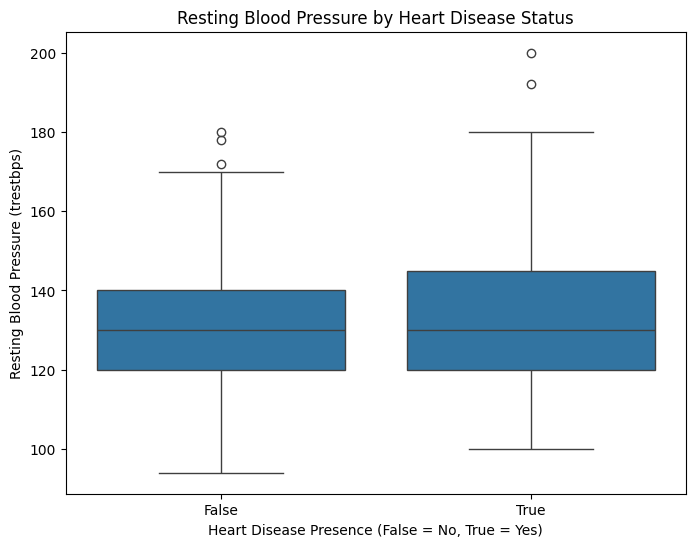

In [87]:
bp_no_hd = df_features[df_heart_disease['num'] == 0]['trestbps']
bp_with_hd = df_features[df_heart_disease['num'] > 0]['trestbps']

# Mann-Whitney U Test
stat, p_value = stats.mannwhitneyu(bp_no_hd, bp_with_hd, alternative='two-sided')
print(f"Mann-Whitney U test for Resting Blood Pressure: U-statistic={stat:.3f}, p-value={p_value:.3f}")

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_heart_disease['num'] > 0, y=df_features['trestbps'])
plt.xlabel("Heart Disease Presence (False = No, True = Yes)")
plt.ylabel("Resting Blood Pressure (trestbps)")
plt.title("Resting Blood Pressure by Heart Disease Status")
plt.show()